# A Quantum ''Hello World"

This is my first working program using actual quantum computers on the IBM quantum experience network. It is a code that gives a very good perspective on the Qiskit package and how to use it. The link below shows the step-by-step tutorial

Link: https://www.youtube.com/watch?v=RrUTwq5jKM4&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=3

## Project

It was not all smooth sailing as there were some areas that are not covered in the video which I had to dig out by following what other people have done. There were several key points which are covered as the project deveopls, lets get started

In [1]:
# Load the qiskit package
from qiskit import *

In [2]:
# Load the version details as the errors, solutions and data maybe dependant on qiskit version
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.4', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.14.0', 'qiskit-aqua': '0.9.2', 'qiskit': '0.27.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
# Define quantum and classical (measurements) registers
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

print(qr)
print(cr)

QuantumRegister(2, 'q0')
ClassicalRegister(2, 'c0')


In [4]:
# Define quantum circuit
qc = QuantumCircuit(qr, cr)

In [5]:
# Draw the circuit
%matplotlib inline
qc.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

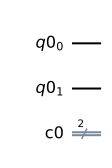

In [6]:
# Draw circuit with better presentation
qc.draw(output='mpl')

#### Problem: 
The circuit.draw(output='mpl') did not work

#### Solution:
The “pylatexenc” module must be installed first as noted by Joydeep Ghatak on the comments on the video. This is a series of routines that parse the LaTeX structure. To install simply open the Anaconda command prompt and type 'pip install pylatexenc'. Once this is installed the above error is rectified

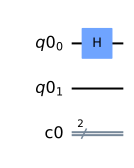

In [7]:
# Add entanglement via Hadamard gate then draw the circuit
qc.h(qr[0])
qc.draw(output='mpl')

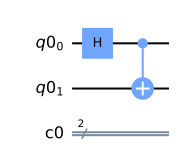

In [8]:
# Add a control not gate between the quantum bits
qc.cx(qr[0],qr[1])
qc.draw(output='mpl')

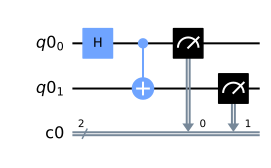

In [9]:
# Add measurements of quantum bits to the classical bits
qc.measure(qr,cr)
qc.draw(output='mpl')

Next, we simulate the above quantum circuit in an idealised virtual quantum computer. This runs on your personal computer which shows the expected outcome of the above circuit. It is done in four steps as follows.

In [10]:
# Load the virtual idealised quantum computer
simulator = Aer.get_backend('qasm_simulator')

In [11]:
# Run the quantum circuit on the loaded simulator
LocalRun = execute(qc, backend = simulator)

In [12]:
# Obtain results from the local run
resultLR = LocalRun.result()

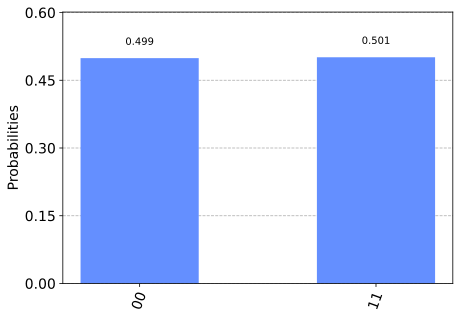

In [13]:
# Plot the results of the local run by importing visualisation tools
from qiskit.tools.visualization import plot_histogram as pltHG
pltHG(resultLR.get_counts(qc))

Next is to run the above quantum circuit on an actual quantum computer. There were several challenges that I came across during this step. These are defined and as we go through the steps

In [14]:
# Load the IBM Account
# How to save the IBM account: https://www.youtube.com/watch?v=M4EkW4VwhcI&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=3
Acc = IBMQ.load_account()

In [15]:
# Define the provider
provider = IBMQ.get_provider('ibm-q')

Next the tutorial suggests using the quantum computer as 

qcomp = provider.get_backend('ibmq_16_melbourne')

#### Problem:
provider.get_backend('ibmq_16_melbourne') returns the error 'No backend matches the criteria'

#### Solution 1:
The link below shows how to obtain the least busy backend

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep3_Hello_World.ipynb

In [16]:
num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_belem


The above suggests 'ibmq_belem', however when the job is passed to this quantum computer the following error occurred

'Job Status: job incurred error'

#### Solution 2:
As answered by KAJ226 on the link below

https://quantumcomputing.stackexchange.com/questions/15861/how-to-fix-an-error-qiskitbackendnotfounderror-no-backend-matches-the-crit

All services can be viewed another quantum computer can be used

In [17]:
from qiskit import IBMQ, Aer
# Acc = IBMQ.load_account()
available_cloud_backends = Acc.backends() 
print('\nHere is the list of cloud backends that are available to you:')
for i in available_cloud_backends: print(i)

available_local_backends = Aer.backends() 
print('\nHere is the list of local backends that are available to you: ')
for i in available_local_backends: print(i)


Here is the list of cloud backends that are available to you:
ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

Here is the list of local backends that are available to you: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [18]:
# Pick the cloud backend and define the quantum computer
qcomp = provider.get_backend('ibmq_quito')

In [19]:
# Import Jupyter Notebook extension to view the job status 
# Link https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep3_Hello_World.ipynb
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [20]:
# Define the job and run it on the quantum computer
job = execute(qc, backend=qcomp)

# You may also view the status of the job without the Jupyter Notebook extension
# from qiskit.tools.monitor import job_monitor
# job_monitor(job)

In [21]:
# Upon successful completion disable the Jypter Notebook extension
%qiskit_disable_job_watcher

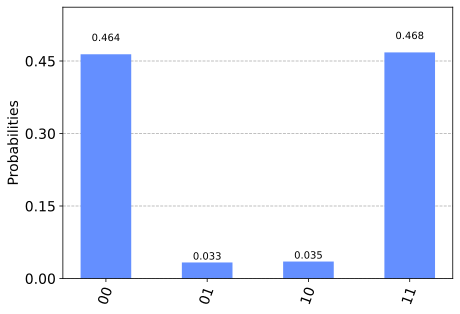

In [22]:
# Load the results of the quantum computer and plot data
resultQC = job.result()
pltHG(resultQC.get_counts(qc))

## Conclusion

The above shows the that the quantum computer returns the expected results with an error of 6.8%. When these states are disregarded, the |00> state has a probability of 0.498 and |11> of 0.502 which is only a 0.2% variation from the idealized simulation.

Thank you,

Anushka Thenuwara, PhD